In [1]:
import sklearn
import sklearn.mixture
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import time
import random
import scipy
import scipy.stats

In [2]:
#file with data
file='./formationchannels.npy'
data=np.load(file)

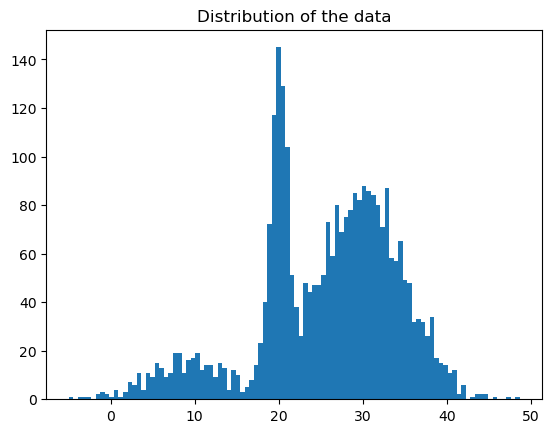

In [3]:
#histogram of the data
histo=plt.hist(data,bins=100)
plt.title('Distribution of the data')
plt.show()

In [4]:
#do the gaussian mixture fit for n_components from 1 to 10 (can't do from 0)
N_compon = np.arange(1, 10) #numbers of components (gaussian used)
gmm=[]
for i in N_compon:
    gmm.append(sklearn.mixture.GaussianMixture(n_components=i))

#do the fit of data with the gmm found 
fits=[]
for i in range(0,N_compon[-1]):
    fits.append(gmm[i].fit(data))

In [5]:
#save means and covariances of the fitted models
means=[]
cov=[]

for i in range(0,N_compon[-1]):
    means.append(fits[i].means_.flatten())
    cov.append(fits[i].covariances_.flatten())

In [6]:
#from these fits: compute the AIC
aic_val=[]
for i in range(0,N_compon[-1]):
    aic_val.append(fits[i].aic(data))

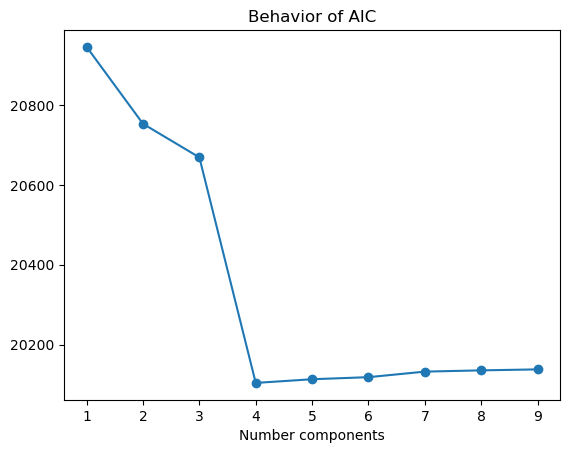

In [7]:
plt.plot(N_compon,aic_val)
plt.scatter(N_compon,aic_val)
plt.xlabel('Number components')
plt.title('Behavior of AIC')
plt.show()

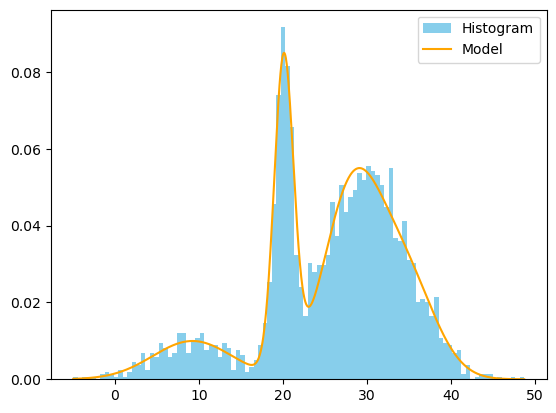

In [8]:
#find the best fit
Model_best = fits[np.argmin(aic_val)]

#plot of the best fit
x = np.linspace(data.min(), data.max(), 1000)
pdf = np.exp(Model_best.score_samples(x.reshape(-1, 1))) #score expressed in log space

plt.hist(data, bins=100, density=True, color='skyblue', label='Histogram')
plt.plot(x, pdf, color='orange', label='Model')
plt.legend()

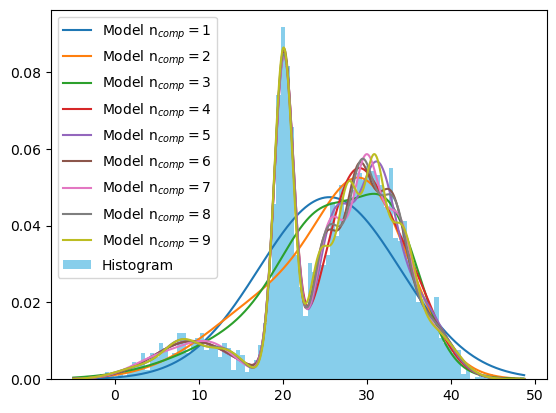

In [9]:
#fit of the models found
models=[]
for i in range(0,N_compon[-1]):
    models.append(fits[i])

pdf_models=[]
for i in range(0,N_compon[-1]):
    pdf_models.append(np.exp(models[i].score_samples(x.reshape(-1, 1))))
    plt.plot(x, pdf_models[i], label='Model n$_{comp}=$'+str(i+1))

plt.hist(data, bins=100, density=True, color='skyblue', label='Histogram')
plt.legend()
plt.show()